<a href="https://colab.research.google.com/github/sahil301290/Paddy-Disease-Classification/blob/main/Paddy_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Downloading Original Imbalanced Dataset

In [1]:
# !gdown "1EM7WgjdkQK5WkI4V8w5V-mZ2riEBNbpE" -O "PaddyDisease-Train.zip"

Downloading...
From: https://drive.google.com/uc?id=1EM7WgjdkQK5WkI4V8w5V-mZ2riEBNbpE
To: /content/PaddyDisease-Train.zip
100% 763M/763M [00:16<00:00, 46.7MB/s]


###Downloading Balanced Dataset

In [3]:
!gdown "13JtUkVUqPK4OR0aYGfzWMJmO4lRNB7D9" -O "PaddyDisease-Train.zip"

Downloading...
From: https://drive.google.com/uc?id=13JtUkVUqPK4OR0aYGfzWMJmO4lRNB7D9
To: /content/PaddyDisease-Train.zip
100% 1.30G/1.30G [00:27<00:00, 47.1MB/s]


In [4]:
!unzip "/content/PaddyDisease-Train.zip" >& /dev/null

###Original Imbalanced Histogram - Do Not Touch, if using Balanced Dataset

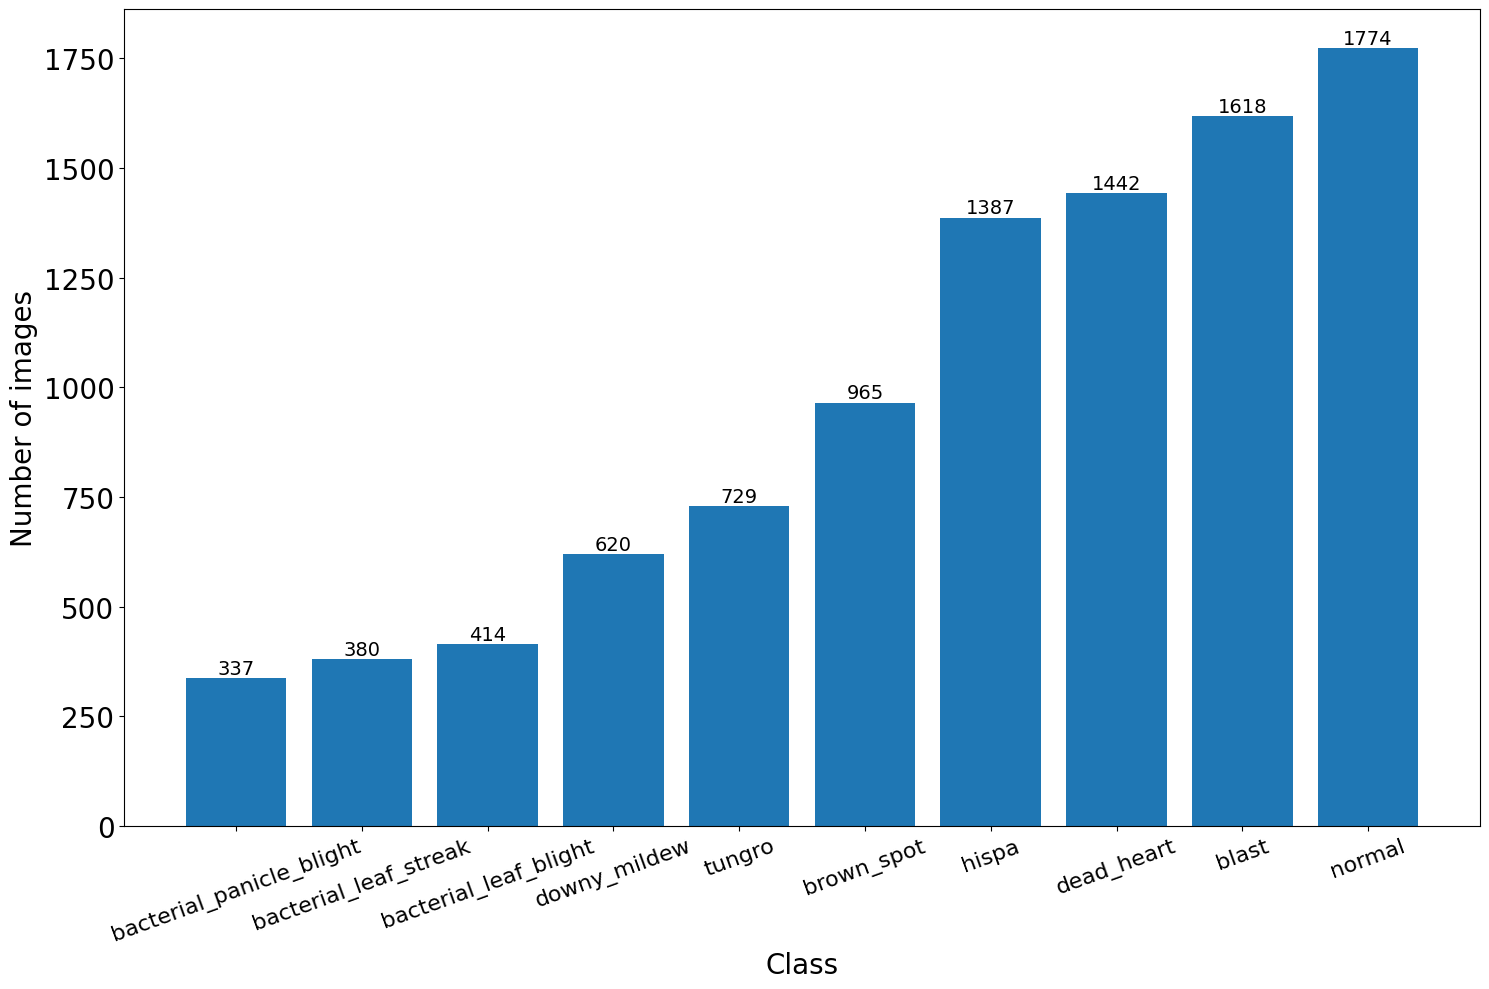

In [3]:
# import os
# import matplotlib.pyplot as plt

# # Set the path to the directory containing the images
# path = "/content/train_images"

# # Get the list of all the folders in the directory
# folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

# # Count the number of images in each folder
# counts = []
# for folder in folders:
#     folder_path = os.path.join(path, folder)
#     num_files = len([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
#     counts.append(num_files)

# # Combine folder names and counts, then sort by counts
# combined = list(zip(folders, counts))
# combined.sort(key=lambda x: x[1])

# # Split back into folders and counts for plotting
# sorted_folders, sorted_counts = zip(*combined)

# # Plot the histogram
# plt.figure(figsize=(15, 10))
# bars = plt.bar(sorted_folders, sorted_counts)

# # Annotate each bar with its count
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)),
#              ha='center', va='bottom', fontsize=14)

# plt.xlabel('Class', fontsize=20)
# plt.ylabel('Number of images', fontsize=20)
# plt.xticks(rotation=20, fontsize=16)
# plt.yticks(fontsize=20)
# plt.tight_layout()
# plt.show()

###Dataset Augmentation, if using Imbalanced Dataset

In [4]:
# import numpy as np
# import os
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# from tensorflow.keras.utils import array_to_img

# # Set the path to the directory containing the images
# path = "/content/train_images"

# # Define the ImageDataGenerator for augmentation
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Get the maximum number of images among all classes
# max_images = max(sorted_counts)

# # Loop through each class and augment images as needed
# for folder, count in zip(sorted_folders, sorted_counts):
#     folder_path = os.path.join(path, folder)

#     # Number of images to be generated for the current class
#     num_gen = max_images - count

#     # Get all image files from the directory
#     image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

#     for i in range(num_gen):
#         # Randomly select an image from the current class for augmentation
#         random_image = np.random.choice(image_files)
#         img_path = os.path.join(folder_path, random_image)
#         img = load_img(img_path)  # Load the image into PIL format
#         x = img_to_array(img)  # Convert the image to a numpy array
#         x = x.reshape((1,) + x.shape)  # Reshape the image

#         # Generate augmented images and save them to the directory
#         prefix = random_image.split('.')[0]  # To keep a similar naming convention
#         for batch in datagen.flow(x, batch_size=1, save_to_dir=folder_path, save_prefix=prefix, save_format='jpeg'):
#             break  # We only need one augmented image per original image in each iteration

# print("Augmentation completed!")

Augmentation completed!


###Histogram of Balanced Dataset

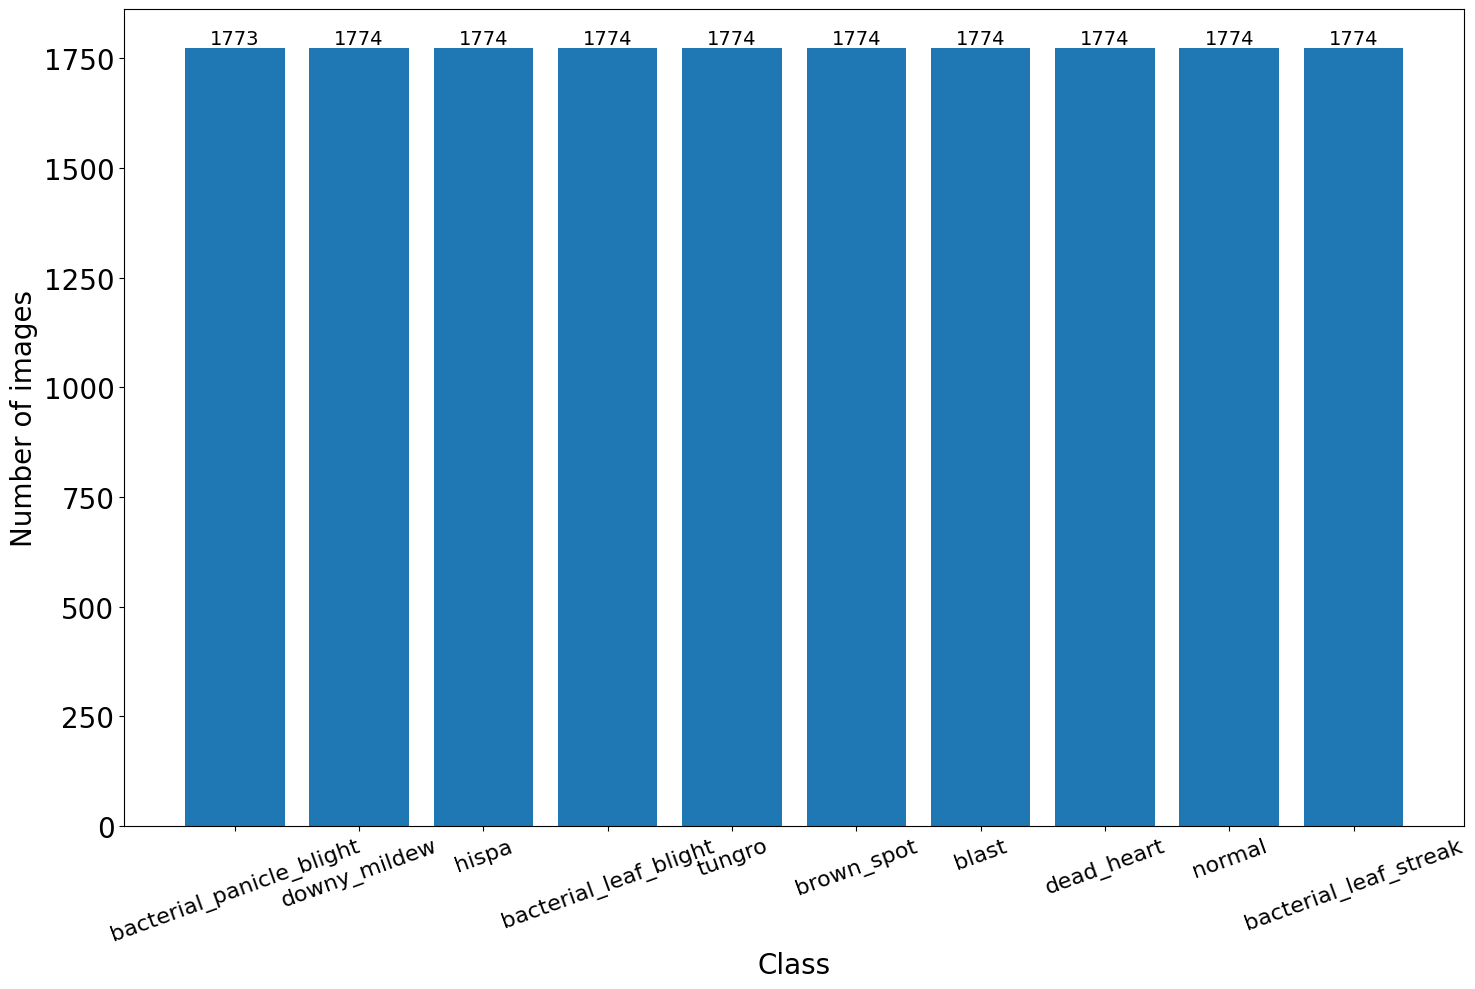

In [6]:
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the images
path = "/content/content/train_images"

# Get the list of all the folders in the directory
folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

# Count the number of images in each folder
counts = []
for folder in folders:
    folder_path = os.path.join(path, folder)
    num_files = len([f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    counts.append(num_files)

# Combine folder names and counts, then sort by counts
combined = list(zip(folders, counts))
combined.sort(key=lambda x: x[1])

# Split back into folders and counts for plotting
sorted_folders, sorted_counts = zip(*combined)

# Plot the histogram
plt.figure(figsize=(15, 10))
bars = plt.bar(sorted_folders, sorted_counts)

# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)),
             ha='center', va='bottom', fontsize=14)

plt.xlabel('Class', fontsize=20)
plt.ylabel('Number of images', fontsize=20)
plt.xticks(rotation=20, fontsize=16)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

###Zipping the balanced data, No need if already using Balanced Data

In [ ]:
#!zip -r /content/balanced_train_images.zip /content/train_images >& /dev/null

Found 17739 files belonging to 10 classes.
Class Names: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']
Total Number of Classes: 10


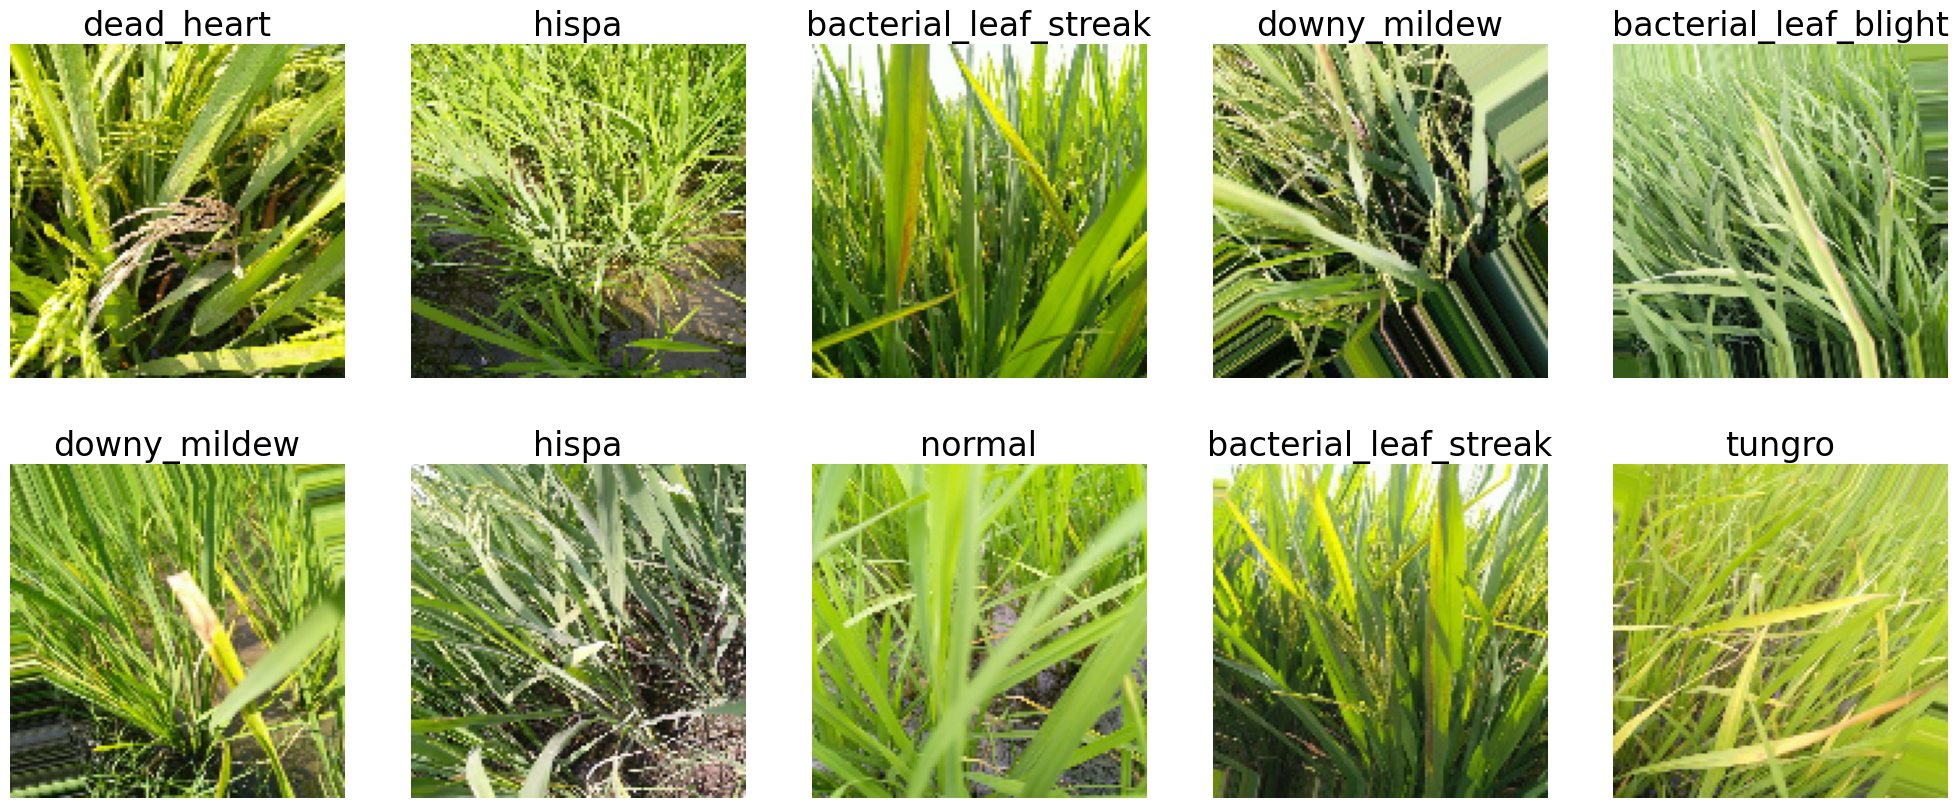

Total Batches in Dataset: 555


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = 128  # Update this to your desired image size
BATCH_SIZE = 32   # Update this to your desired batch size

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/content/train_images",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Get class names
class_names = dataset.class_names
total_class = len(class_names)

print(f"Class Names: {class_names}")
print(f"Total Number of Classes: {total_class}")

# Print sample images from the dataset
plt.figure(figsize=(25, 10))

# We'll just take one batch from the dataset
for image_batch, labels_batch in dataset.take(1):
    for i in range(10):  # Displaying 10 images in a 2x5 grid
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        # Set the title with increased font size
        plt.title(class_names[labels_batch[i]], fontsize=24)

        plt.axis("off")

# Save the plot with high resolution
plt.savefig("sample_images.png", dpi=600)

# Display the plot
plt.show()

# Print the number of batches in the dataset
print(f"Total Batches in Dataset: {len(dataset)}")

In [8]:
from typing import Tuple

def get_dataset_partitions_tf(ds: tf.data.Dataset,
                              train_split: float = 0.8,
                              val_split: float = 0.1,
                              test_split: float = 0.1,
                              shuffle: bool = True,
                              shuffle_size: int = 10000) -> Tuple[tf.data.Dataset, tf.data.Dataset, tf.data.Dataset]:
    """
    Splits the dataset into training, validation, and test sets.
    """
    # Ensure the splits add up to 1
    assert (train_split + test_split + val_split) == 1, "Splits must sum up to 1."

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds

# Splitting the dataset
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Print the size of each partition
print(f"Train_Dataset: {len(train_ds)}")
print(f"Validation_Dataset: {len(val_ds)}")
print(f"Test_Dataset: {len(test_ds)}")
print(f"\nDataset Split - Train: {len(train_ds)} | Validation: {len(val_ds)} | Test: {len(test_ds)}")

Train_Dataset: 444
Validation_Dataset: 55
Test_Dataset: 56

Dataset Split - Train: 444 | Validation: 55 | Test: 56


In [9]:
strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")  # or "/cpu:0" for CPU

In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers
import tensorflow as tf

def build_model(num_classes):
    inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # Removing the img_augmentation call
    # x = img_augmentation(inputs)
    base_model = EfficientNetB4(include_top=False, input_tensor=inputs, weights="imagenet")  # Using 'inputs' directly

    # Freeze the pretrained weights
    base_model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    #for multiclasses
    model.compile(
        optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,metrics=["accuracy"]
    )

    return model

# Ensure you've defined the strategy before this:
# strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")  # or another strategy of your choice

with strategy.scope():
    model = build_model(num_classes=len(class_names))

#model.summary()

In [11]:
import requests

# Constants
IMAGE_SIZE = 128  # Define your image size
TOP_DROPOUT_RATE = 0.2
LEARNING_RATE = 1e-2
FINE_TUNING_LEARNING_RATE = 1e-4

def unfreeze_model(model: tf.keras.Model):
    """Unfreezes the top layers of the model."""
    # Unfreeze the top 20 layers, except BatchNorm layers
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=FINE_TUNING_LEARNING_RATE)
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=["accuracy"])

unfreeze_model(model)

# Fetch data from the provided URL
url = "http://diseaseai.agrikheti.com/area"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()  # Assuming the response is in JSON format
    print(data)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


{'Paddy': 100000.5, 'Others': 750000.2, 'Urban_area': 500000, 'Forest': 240000, 'River': 300000, 'Road': 400000, 'Tree': 600000}


Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.64432, saving model to /content/EfficientNETB4_Crop_01_best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


444/444 - 53s - loss: 1.6603 - accuracy: 0.4547 - val_loss: 1.1052 - val_accuracy: 0.6443 - lr: 1.0000e-04 - 53s/epoch - 119ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.64432 to 0.74659, saving model to /content/EfficientNETB4_Crop_02_best_model.h5
444/444 - 27s - loss: 1.1387 - accuracy: 0.6206 - val_loss: 0.7828 - val_accuracy: 0.7466 - lr: 1.0000e-04 - 27s/epoch - 60ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.74659 to 0.79091, saving model to /content/EfficientNETB4_Crop_03_best_model.h5
444/444 - 27s - loss: 0.9330 - accuracy: 0.6904 - val_loss: 0.6531 - val_accuracy: 0.7909 - lr: 1.0000e-04 - 27s/epoch - 60ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.79091 to 0.83977, saving model to /content/EfficientNETB4_Crop_04_best_model.h5
444/444 - 27s - loss: 0.7991 - accuracy: 0.7303 - val_loss: 0.5305 - val_accuracy: 0.8398 - lr: 1.0000e-04 - 27s/epoch - 60ms/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.83977 to 0.86420, saving model 

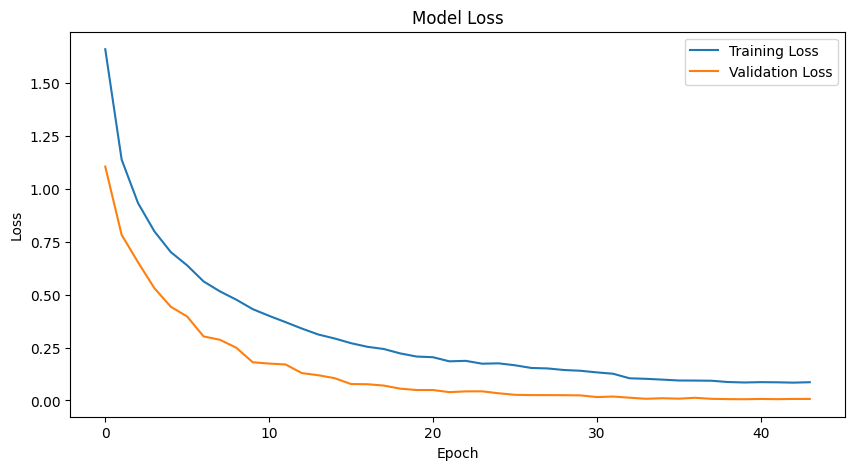

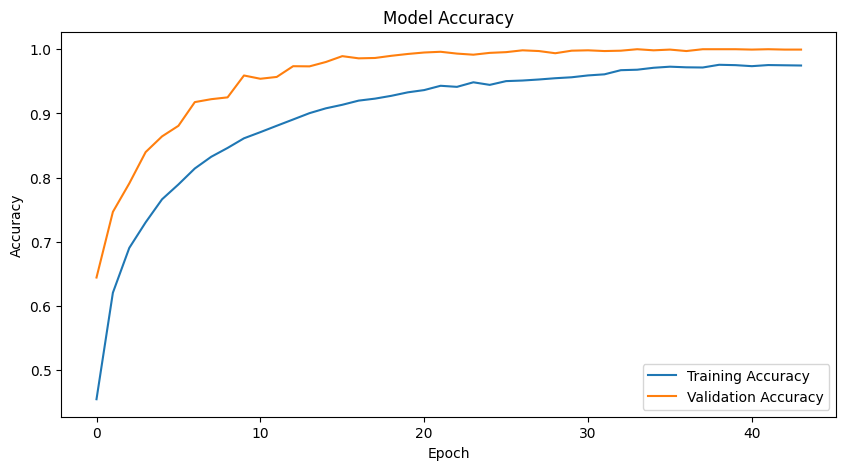

56/56 [==============================] - 8s 25ms/step - loss: 0.0064 - accuracy: 1.0000
Test Loss: 0.006429719738662243, Test Accuracy: 1.0


OSError: ignored

In [12]:
import time
import matplotlib.pyplot as plt
import tensorflow as tf

# Define callbacks
# Save the model with the best validation accuracy
model_save_path = '/content/EfficientNETB4_Crop_{epoch:02d}_best_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Reduce learning rate when validation accuracy plateaus
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Stop training early if the validation accuracy doesn't improve for 10 consecutive epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

# Training the Model
start_time = time.time()

epochs = 100
hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds, verbose=2,
                 callbacks=[checkpoint, reduce_lr, early_stop])

elapsed_time = time.time() - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

# Plotting Training History
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('LossVal_loss.png')
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('AccVal_acc.png')
plt.show()

# Model Evaluation on Test Data
scores = model.evaluate(test_ds)
print(f"Test Loss: {scores[0]}, Test Accuracy: {scores[1]}")

In [13]:
# Loading the best Saved Model (Modify this part as needed, based on which epoch model you want to load)
best_model_path = '/content/EfficientNETB4_Crop_34_best_model.h5'
loaded_model = tf.keras.models.load_model(best_model_path)
print("Best model loaded successfully")

Best model loaded successfully


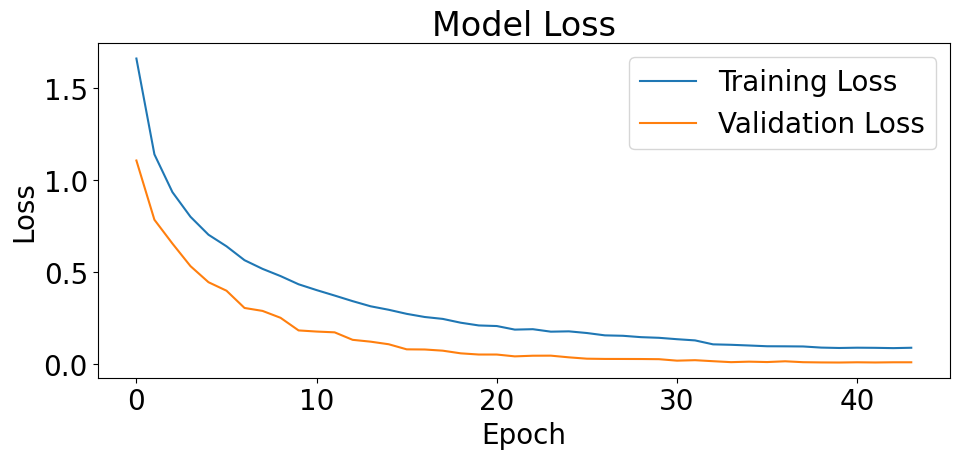

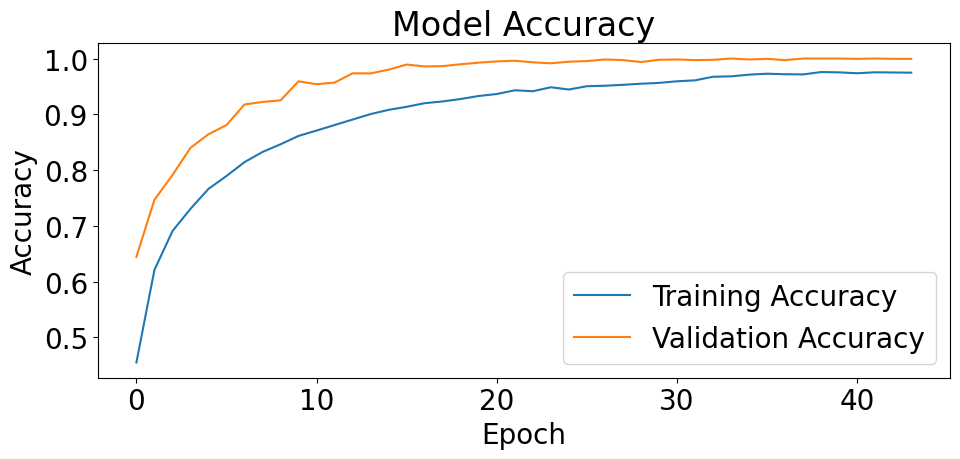

In [16]:
import matplotlib.pyplot as plt

# Updating default font size
plt.rcParams.update({'font.size': 20})

# Plotting Training History

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()  # This will ensure that everything fits well
plt.savefig('LossVal_loss.png', dpi=600)
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()  # This will ensure that everything fits well
plt.savefig('AccVal_acc.png', dpi=600)
plt.show()

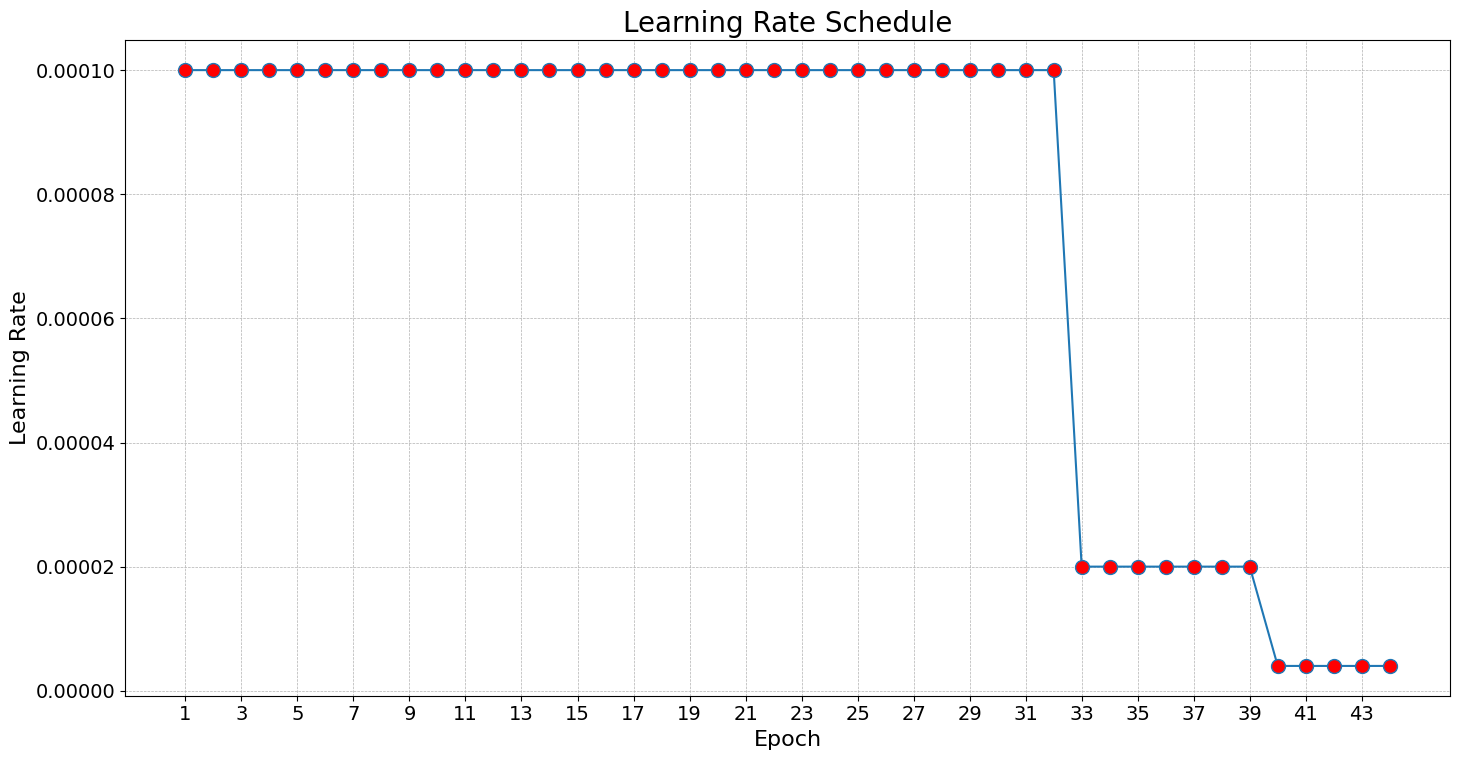

In [18]:
import matplotlib.pyplot as plt

# Define epochs and learning rates
epochs = list(range(1, 45))
learning_rates = []

# Constant LR from epoch 1 to 32
learning_rates.extend([1.0000e-04] * 32)

# LR changes at Epoch 33 to 1.9999999494757503e-05 till epoch 39
learning_rates.extend([1.9999999494757503e-05] * 7)

# LR updated at epoch 40 to 3.999999898951501e-06 till epoch 44
learning_rates.extend([3.999999898951501e-06] * 5)

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(epochs, learning_rates, '-o', markerfacecolor='red', markersize=10)
plt.title('Learning Rate Schedule', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Learning Rate', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Space out the x-ticks to avoid overlapping
plt.xticks(epochs[::2])  # show every second epoch on the x-axis
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.tight_layout()
plt.savefig('LearningRate.png', dpi=600)
plt.show()

1/1 [==============================] - 0s 37ms/step


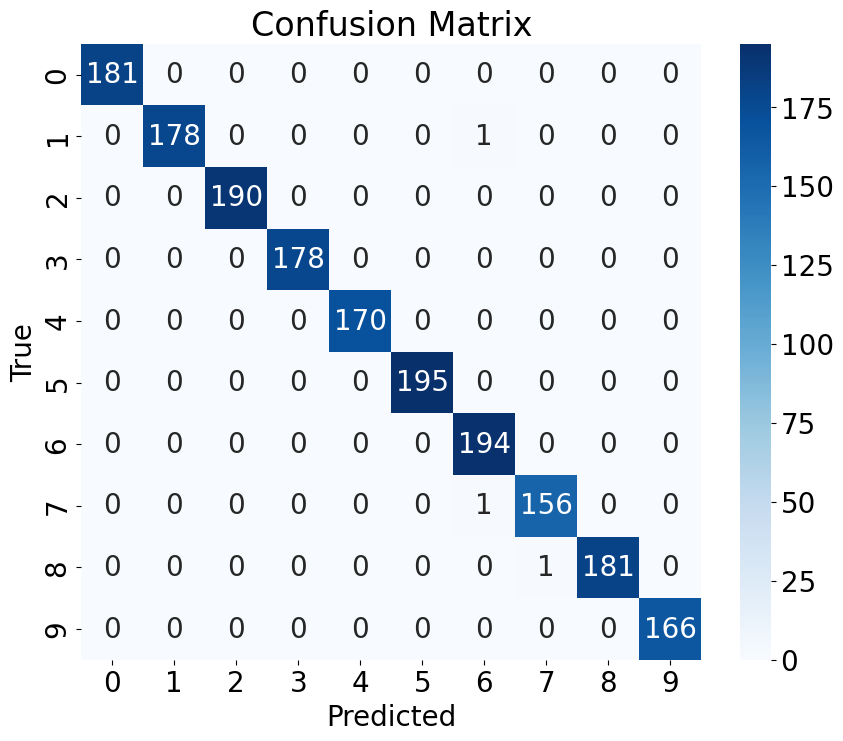

In [21]:
# Getting the true labels and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = loaded_model.predict(images)

    # Check if labels are one-hot encoded or not
    if len(labels.shape) > 1 and labels.shape[1] > 1:  # One-hot encoded labels
        y_true.extend(np.argmax(labels, axis=1))
    else:  # Direct class indices
        y_true.extend(labels)

    y_pred.extend(np.argmax(predictions, axis=1))

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('ConfusionMatrix.png', dpi=600)
plt.show()

In [22]:
from sklearn.metrics import classification_report

# Generating classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

                          precision    recall  f1-score   support

   bacterial_leaf_blight       1.00      1.00      1.00       181
   bacterial_leaf_streak       1.00      0.99      1.00       179
bacterial_panicle_blight       1.00      1.00      1.00       190
                   blast       1.00      1.00      1.00       178
              brown_spot       1.00      1.00      1.00       170
              dead_heart       1.00      1.00      1.00       195
            downy_mildew       0.99      1.00      0.99       194
                   hispa       0.99      0.99      0.99       157
                  normal       1.00      0.99      1.00       182
                  tungro       1.00      1.00      1.00       166

                accuracy                           1.00      1792
               macro avg       1.00      1.00      1.00      1792
            weighted avg       1.00      1.00      1.00      1792

